In [1]:
import os
import json

In [2]:
def get_number_of_models(file):
    with open(os.path.join(os.path.join("out","d4_compilation_stats"),file), 'r') as fp:
        data = json.load(fp)
    if data['Number of models']=="NaN":
        return -1
    return int(data['Number of models'])

# Data analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [4]:
def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False

In [5]:
data = {}
timeout = 600

In [6]:
def load_maxhd_data(directory, col_name, nb):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_max = json.load(fp)
            data[file]={}
        for key,tmp in data_max.items():
            if len(tmp)>=nb and is_float(tmp[nb-1]):
                data[file][col_name % key]=tmp[nb-1]
            else: 
                if tmp[-1] == "UNSAT" and tmp[-2]<timeout:
                    data[file][col_name % key]=tmp[-2]
                else: 
                    data[file][col_name % key]=pd.NA
    return data

maxhs_key = "MaxHS Top 50 Enum %s"
tmp = load_maxhd_data("out/top50_config_maxhs", maxhs_key, 50)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])

In [7]:
def load_compilation_time(directory,col_name):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_d4 = json.load(fp)
        data[file] = {}
        if data_d4['Compilation time'] != "NaN":
            data[file][col_name]=data_d4['Compilation time']
        else:
            data[file][col_name]=pd.NA
    return data

compil_key = "d4 compilation (seconds)"
tmp =load_compilation_time("out/d4_compilation_stats",compil_key)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])


In [8]:
def load_jddnnf_data(directory, col_name):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_j = json.load(fp)
        data[file] = {}
        for key,tmp in data_j.items():
            if tmp['total'] != "TIMEOUT":
                data[file][col_name % key]=tmp['total']
            else:
                data[file][col_name % key]=pd.NA
    return data

jddnnf_key = "jddnnf Top 50 Enum %s"
tmp = load_jddnnf_data("out/top50_config_jddnnf",jddnnf_key)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])

In [9]:
data_df = pd.DataFrame.from_dict(data,orient='index')
data_df

,MaxHS Top 50 Enum 0,d4 compilation (seconds),jddnnf Top 50 Enum 0
10.sk_1_46.json,4.184135,0.065926,0.268999
107.sk_3_90.json,8.811496,0.328782,0.618679
109.sk_4_36.json,7.450435,0.330399,0.322579
10random.json,12.112973,0.066110,0.567290
110.sk_3_88.json,37.02063,0.815984,2.590557
...,...,...,...
lss.sk_6_7.json,NaN,294.210074,128.052199
mastermind_03_08_05.net.json,NaN,-1.000000,NaN
reverse.sk_11_258.json,NaN,114.676358,NaN
uf250-033.json,NaN,6.179372,0.817404


# Computing the average for MaxHS

In [10]:
max_df = data_df[[maxhs_key % "0" ]]

data_df.loc[max_df.isnull().any(axis=1),"MaxHS Top 50 Enum 0"] = timeout
data_df.loc[data_df["MaxHS Top 50 Enum 0"]>timeout,"MaxHS Top 50 Enum 0"] = timeout
data_df

,MaxHS Top 50 Enum 0,d4 compilation (seconds),jddnnf Top 50 Enum 0
10.sk_1_46.json,4.184135,0.065926,0.268999
107.sk_3_90.json,8.811496,0.328782,0.618679
109.sk_4_36.json,7.450435,0.330399,0.322579
10random.json,12.112973,0.066110,0.567290
110.sk_3_88.json,37.02063,0.815984,2.590557
...,...,...,...
lss.sk_6_7.json,600,294.210074,128.052199
mastermind_03_08_05.net.json,600,-1.000000,NaN
reverse.sk_11_258.json,600,114.676358,NaN
uf250-033.json,600,6.179372,0.817404


# Taking care of d4 failure

In [11]:
data_df.loc[data_df[[compil_key]].isnull().any(axis=1),compil_key] = timeout
data_df.loc[data_df[compil_key]==-1,compil_key] = timeout
data_df.loc[data_df[compil_key]>timeout,compil_key] = timeout
data_df

,MaxHS Top 50 Enum 0,d4 compilation (seconds),jddnnf Top 50 Enum 0
10.sk_1_46.json,4.184135,0.065926,0.268999
107.sk_3_90.json,8.811496,0.328782,0.618679
109.sk_4_36.json,7.450435,0.330399,0.322579
10random.json,12.112973,0.066110,0.567290
110.sk_3_88.json,37.02063,0.815984,2.590557
...,...,...,...
lss.sk_6_7.json,600,294.210074,128.052199
mastermind_03_08_05.net.json,600,600.000000,NaN
reverse.sk_11_258.json,600,114.676358,NaN
uf250-033.json,600,6.179372,0.817404


# Computing the average for jddnnf

In [12]:
max_df = data_df[[jddnnf_key % "0"]]

data_df.loc[max_df.isnull().any(axis=1),"jddnnf Top 50 Enum 0"] = timeout
data_df.loc[data_df["jddnnf Top 50 Enum 0"]>timeout,"jddnnf Top 50 Enum 0"] = timeout
data_df

,MaxHS Top 50 Enum 0,d4 compilation (seconds),jddnnf Top 50 Enum 0
10.sk_1_46.json,4.184135,0.065926,0.268999
107.sk_3_90.json,8.811496,0.328782,0.618679
109.sk_4_36.json,7.450435,0.330399,0.322579
10random.json,12.112973,0.066110,0.567290
110.sk_3_88.json,37.02063,0.815984,2.590557
...,...,...,...
lss.sk_6_7.json,600,294.210074,128.052199
mastermind_03_08_05.net.json,600,600.000000,600.000000
reverse.sk_11_258.json,600,114.676358,600.000000
uf250-033.json,600,6.179372,0.817404


In [13]:
total_key = "Total dDNNF (seconds)"
data_df[total_key]=data_df["jddnnf Top 50 Enum 0"]+data_df["d4 compilation (seconds)"]
data_df.loc[data_df[total_key]>timeout,total_key] = timeout
data_df

,MaxHS Top 50 Enum 0,d4 compilation (seconds),jddnnf Top 50 Enum 0,Total dDNNF (seconds)
10.sk_1_46.json,4.184135,0.065926,0.268999,0.334925
107.sk_3_90.json,8.811496,0.328782,0.618679,0.947461
109.sk_4_36.json,7.450435,0.330399,0.322579,0.652978
10random.json,12.112973,0.066110,0.567290,0.633399
110.sk_3_88.json,37.02063,0.815984,2.590557,3.406540
...,...,...,...,...
lss.sk_6_7.json,600,294.210074,128.052199,422.262274
mastermind_03_08_05.net.json,600,600.000000,600.000000,600.000000
reverse.sk_11_258.json,600,114.676358,600.000000,600.000000
uf250-033.json,600,6.179372,0.817404,6.996776


In [14]:
tmp_df = data_df[data_df["Total dDNNF (seconds)"]==timeout]
tmp_df = tmp_df[tmp_df["MaxHS Top 50 Enum 0"]!=timeout]
print("# of instances solved by MaxHS but not by d4: %d" % tmp_df.shape[0])

tmp_df = data_df[data_df["MaxHS Top 50 Enum 0"]==timeout]
tmp_df = tmp_df[tmp_df["Total dDNNF (seconds)"]!=timeout]
print("# of instances solved by d4 but not by maxhs: %d" % tmp_df.shape[0])

# of instances solved by MaxHS but not by d4: 180
# of instances solved by d4 but not by maxhs: 90


# MaxHS vs full jddnnf

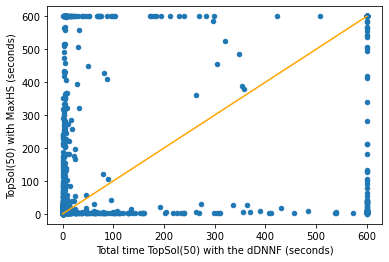

In [15]:
plot_df = data_df[[total_key,"MaxHS Top 50 Enum 0"]].copy()
plot_df = plot_df.rename(columns={total_key:"Total time TopSol(50) with the dDNNF (seconds)", "MaxHS Top 50 Enum 0":"TopSol(50) with MaxHS (seconds)"})
plot_df.plot("Total time TopSol(50) with the dDNNF (seconds)","TopSol(50) with MaxHS (seconds)",kind="scatter")
plt.plot([0,timeout],[0,timeout],'-',color="orange")
plt.show()

In [16]:
tmp_df = data_df[data_df[total_key]==timeout]
tmp_df = tmp_df[tmp_df["MaxHS Top 50 Enum 0"]!=timeout]
print("# of instances solved by MaxHS but not by d4: %d" % tmp_df.shape[0])
tmp_df = data_df[data_df["MaxHS Top 50 Enum 0"]==timeout]
tmp_df = tmp_df[tmp_df[total_key]!=timeout]
print("# of instances solved by d4 but not by maxhs: %d" % tmp_df.shape[0])
tmp_df = data_df[data_df["MaxHS Top 50 Enum 0"]!=timeout]
print("# successes for the MaxHS approach: %d" % tmp_df.shape[0])
print("Success rate for the maxHS approach: %0.2f" % (100*(tmp_df.shape[0])/data_df.shape[0]))
tmp_df = data_df[data_df[total_key]!=timeout]
print("# successes for the compilation approach: %d" % tmp_df.shape[0])
print("Success rate for the dNNF approach: %0.2f" % (100*(tmp_df.shape[0])/data_df.shape[0]))
tmp_df = data_df[data_df["MaxHS Top 50 Enum 0"]<data_df[total_key]]
print("Number of example where MaxHS is faster: %d" % tmp_df.shape[0])
tmp_df = data_df[data_df["MaxHS Top 50 Enum 0"]>data_df[total_key]]
print("Number of example where dDNNF is faster: %d" % tmp_df.shape[0])

# of instances solved by MaxHS but not by d4: 180
# of instances solved by d4 but not by maxhs: 90
# successes for the MaxHS approach: 1220
Success rate for the maxHS approach: 85.02
# successes for the compilation approach: 1130
Success rate for the dNNF approach: 78.75
Number of example where MaxHS is faster: 395
Number of example where dDNNF is faster: 915
